## Import Libraries 

In [147]:
import pandas as pd
import numpy as np
import warnings
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Import CSV File through pandas

In [80]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("bank-additional-full.csv", delimiter=";")
df.replace('unknown', np.nan , inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Check missing values

In [82]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

## Handle missing values

In [84]:
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer.fit_transform(df[categorical_features])
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Remove OutLines

Before Shape: (3376, 21)
After Shape: (2938, 21)


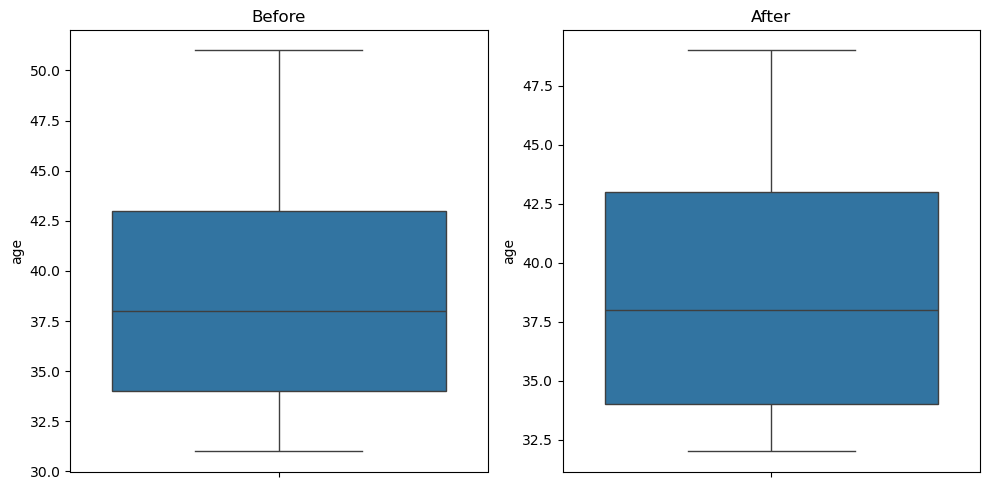

In [201]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Set figure size

print("Before Shape:", df.shape)

# Remove Outliers using 5th and 95th Percentile
max_val = df["age"].quantile(0.95)
min_val = df["age"].quantile(0.05)
dfc = df[(df["age"] > min_val) & (df["age"] < max_val)].copy()

print("After Shape:", dfc.shape)

# Boxplot Before Removing Outliers
sns.boxplot(y=df["age"], ax=axes[0])
axes[0].set_title("Before")

# Boxplot After Removing Outliers
sns.boxplot(y=dfc["age"], ax=axes[1])
axes[1].set_title("After")



# Update DataFrame
df = dfc

## Identify categorical & numerical columns & Q=Q Plot

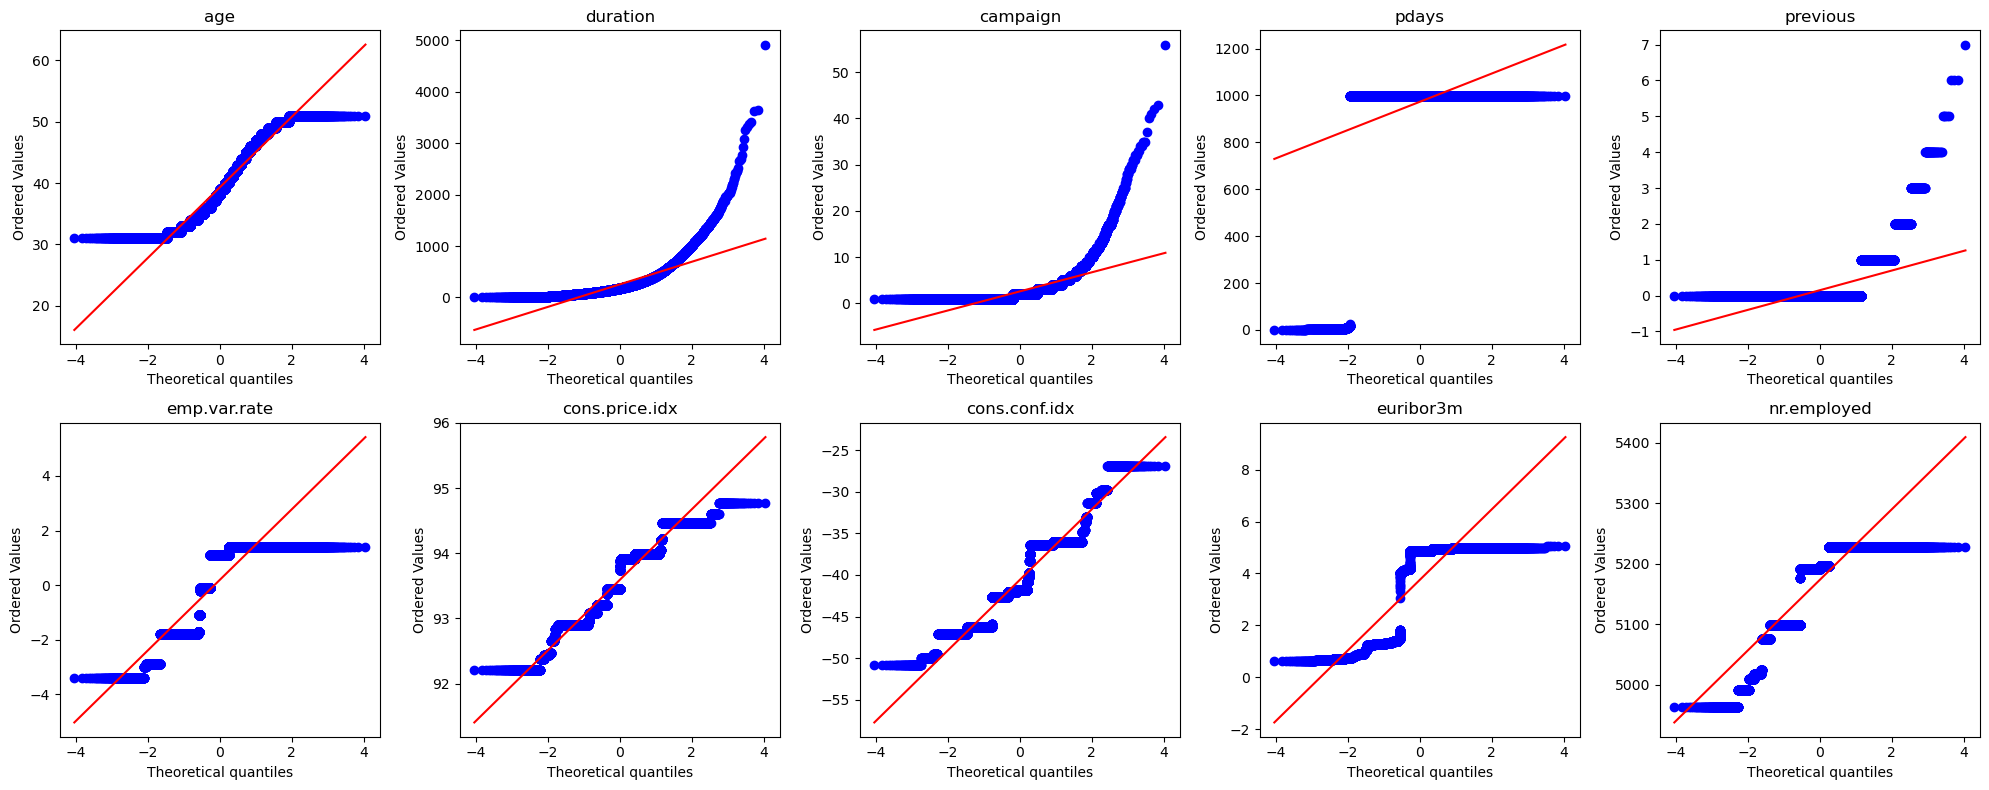

In [130]:
categorical_features = ["job", "marital", "education", "default", "housing", "loan", 
                        "contact", "month", "day_of_week", "poutcome"]
numerical_features = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", 
                      "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

# Set up subplots 
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# loop through each feature and plot 
for i , feature in enumerate(numerical_features):
    row, col = i // 5, i % 5
    stats.probplot(df[feature], dist="norm", plot=axes[row,col]) # Q - Q Plot
    axes[row,col].set_title(feature) 
    

plt.tight_layout()
plt.show()

## Log transform skewed features

In [135]:
skewed_features = ["duration", "campaign", "pdays", "previous"]
for feature in skewed_features:
    df[feature] = np.log1p(df[feature])

##  Q=Q Plot again

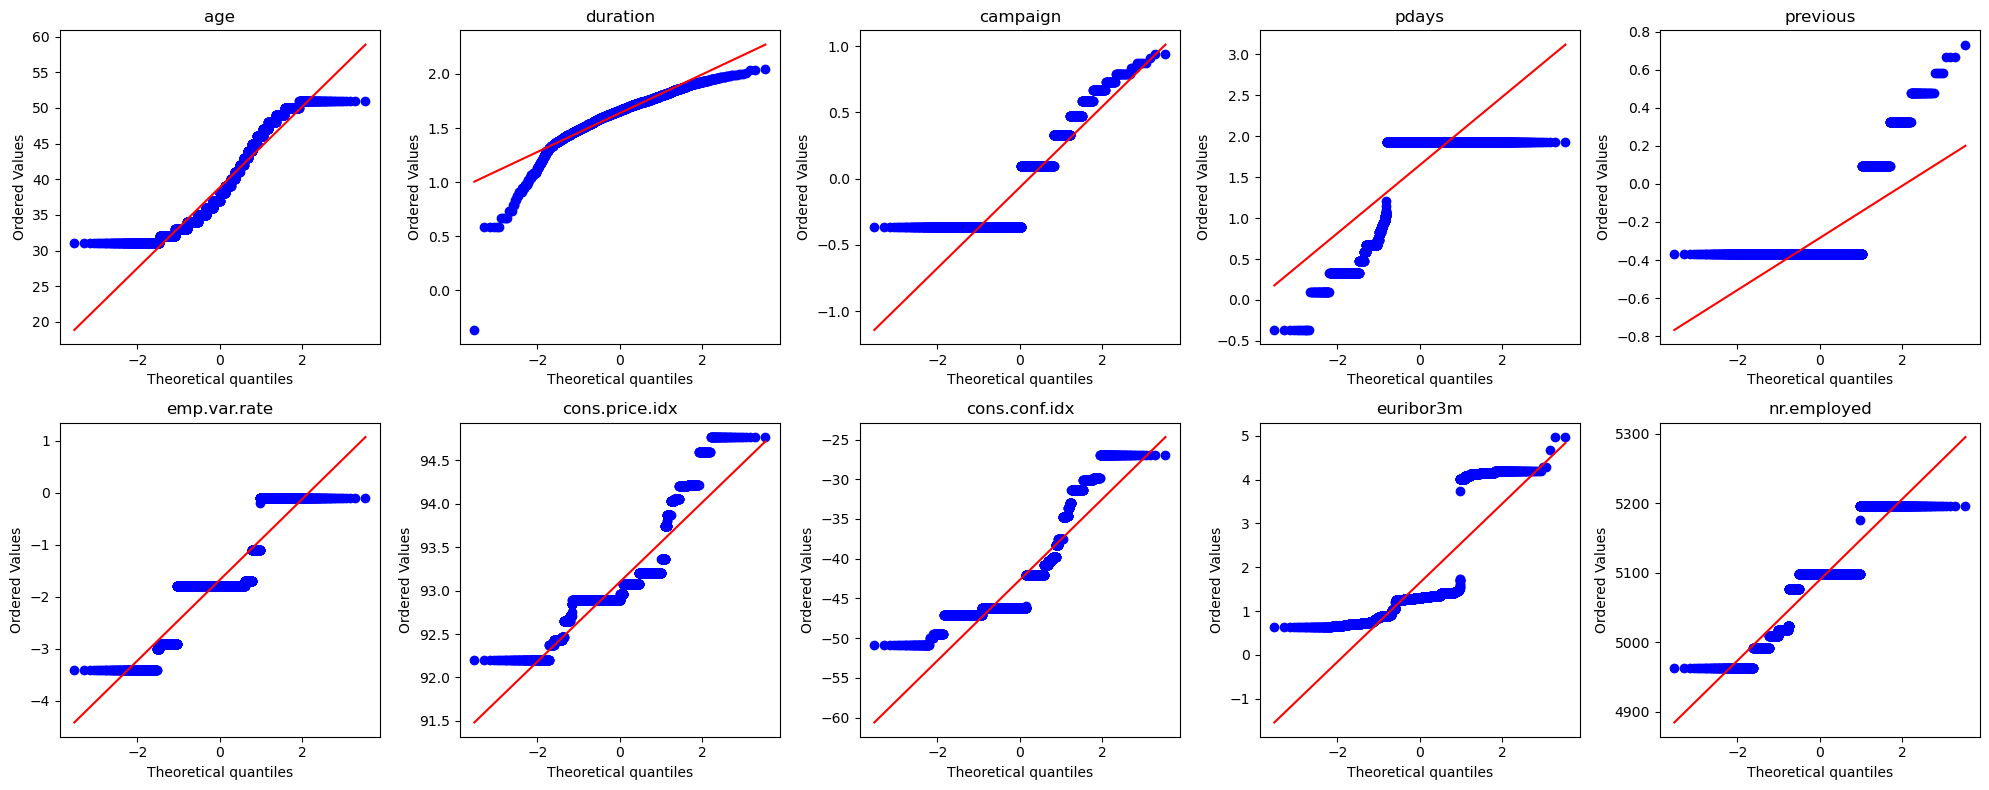

In [183]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i , feature in enumerate(numerical_features):
    row, col = i // 5, i % 5
    stats.probplot(df[feature], dist="norm", plot=axes[row,col])
    axes[row,col].set_title(feature)
    
plt.tight_layout()
plt.show()

## Create preprocessor

In [185]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),  # Scale numerical features
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)  # One-Hot Encode categorical features
])


## Split dataset

In [187]:
# Separate input (X) and output (y)
X = df.drop(columns=["y"]) 
y = df["y"]

X_processed = preprocessor.fit_transform(X)  # Fit and transform data

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


## Train Logistic Regression

In [189]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8801775147928994
Classification Report:
               precision    recall  f1-score   support

          no       0.91      0.94      0.93       543
         yes       0.73      0.62      0.67       133

    accuracy                           0.88       676
   macro avg       0.82      0.78      0.80       676
weighted avg       0.87      0.88      0.88       676



## Train Support Vector Machine

In [191]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8757396449704142
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.95      0.92       543
         yes       0.73      0.58      0.65       133

    accuracy                           0.88       676
   macro avg       0.82      0.76      0.79       676
weighted avg       0.87      0.88      0.87       676



## Save models & preprocessor

In [193]:
joblib.dump(lr_model, "logistic_regression_model.joblib")
joblib.dump(svm_model, "svm_model.joblib")
joblib.dump(preprocessor, "preprocessor.joblib")
joblib.dump(imputer, "imputer.joblib")  # Save imputer to handle missing values in new data

['imputer.joblib']

## Predict

In [199]:
new_data = pd.DataFrame([{
    "age": 45,  # Middle-aged clients have a higher chance
    "duration": 400,  # Longer call duration
    "campaign": 1,  # Contacted only once in this campaign
    "pdays": 10,  # Recently contacted (not 999)
    "previous": 2,  # Had previous successful contacts
    "emp.var.rate": 1.1,  # Positive employment variation
    "cons.price.idx": 94.215,  # Higher consumer price index
    "cons.conf.idx": -29.8,  # Better consumer confidence
    "euribor3m": 4.857,  # Higher Euribor rate (more savings)
    "nr.employed": 5228.1,  # Higher employment
    "job": "management",  # More stable job
    "marital": "married",
    "education": "university.degree",  # Higher education level
    "default": "no",  
    "housing": "no",  # Less financial burden
    "loan": "no",  # No personal loan
    "contact": "cellular",
    "month": "oct",  # Successful campaigns were more common in this month
    "day_of_week": "thu",  # Higher success rate on Thursdays
    "poutcome": "success"  # Previous campaign was successful
}])

lr_model = joblib.load("logistic_regression_model.joblib")
svm_model = joblib.load("svm_model.joblib")
preprocessor = joblib.load("preprocessor.joblib")
imputer = joblib.load("imputer.joblib")  # Load imputer

new_data[categorical_features] = imputer.transform(new_data[categorical_features])  # Handle missing values

new_data_processed = preprocessor.transform(new_data)

# Predict using Logistic Regression
prediction_lr = lr_model.predict(new_data_processed)
print("\nPrediction using Logistic Regression:", prediction_lr)

# Predict using Support Vector Machine
prediction_svm = svm_model.predict(new_data_processed)
print("Prediction using SVM:", prediction_svm)



Prediction using Logistic Regression: ['yes']
Prediction using SVM: ['no']
